# k近傍法

In [113]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 訓練データ生成

In [114]:
x0 = np.random.normal(size=50).reshape(-1, 2) - 1
x1 = np.random.normal(size=50).reshape(-1, 2) + 1

x_train = np.concatenate([x0, x1])
y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


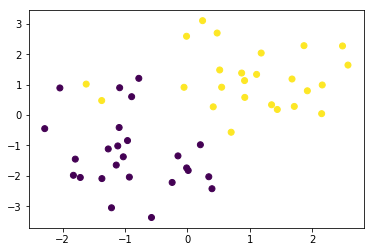

In [115]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

## 学習

陽に訓練ステップはない

## 予測

予測するデータ点との、距離が最も近い$k$個の、訓練データのラベルの最頻値を割り当てる

In [116]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T
print(len(xx[:,0]))

10000


In [165]:
def distance(x1, x2):
    # ユークリッド距離の算出
    return np.sum((x1 - x2)**2, axis=1)

def distance_t(x1, x2):
    # ユークリッド距離の算出（別方法）
    #return np.sqrt(np.sum((x1-x2)**2, axis=1))
    return np.linalg.norm(x1 - x2, axis=1)

# def distance_m(x1, x2):
#     tmp = x1 -x2
#     sum_squared = np.dot(tmp.T , tmp)
#     return np.sqrt(sum_squared)
    
X_train = x_train
X_test = xx
k = 4

# distance1 = distance(X_test[1], X_train)
# print((X_test[1] - X_train)**2)
# indexItem = distance1.argsort()[:k]
# mode1, mode2 = stats.mode(y_train[indexItem])

# Yのpredictを詰め込む空の配列を用意。長さはX_testと同じ長さdtype→データのタイプでyのトレーニングデータと同じ
y_pred = np.empty(len(X_test), dtype=y_train.dtype)
# iは0からの数値でインクリメントされる（通常使われるiと一緒）
for i, x in enumerate(X_test):
    # X_trainは50個の要素、xは2個の要素
    distances = distance_t(x, X_train)
    # sortしたインデックスの配列を返す(argsortメソッド)kはk近傍法のkの値を設定
    # 先頭のk個分、値を取得
    nearest_index = distances.argsort()[:k]
    # 近くにあるプロットされている点の0か1の中で一番多く出てくる値を取得
    # _ は返却されてくる個数を表している（今回は未使用）
    mode, _ = stats.mode(y_train[nearest_index])
    # 0か1の値をセット
    y_pred[i] = mode

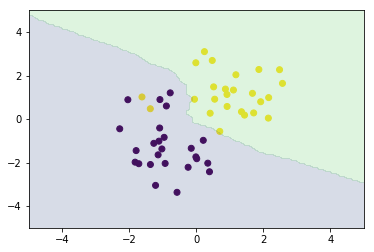

In [166]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))